[Exercise sheet link](https://cagnazzo.wp.imt.fr/files/2018/04/tp_sd205.pdf)

In [1]:
# Modules
import numpy as np
import pywt
import wtTools as wtt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Vanishing moments and DWT of 1-D signals

([<matplotlib.lines.Line2D at 0x12881c2e8>], Text(0.5, 1.0, 'h_3'))

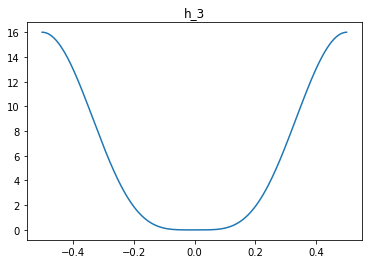

In [3]:
#%% Compute and show the spectrum of h_3 and its derivatives
step = 1.0/1000
nu = np.arange(-0.5,0.5, step)
h3 = 16* (np.sin(np.pi*nu))**4
plt.plot(nu,h3), plt.title('h_3')

Derivative 1


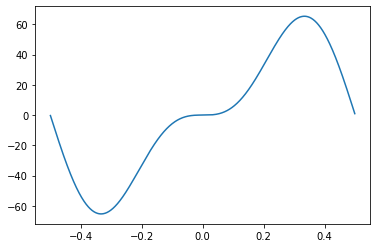

Derivative 2


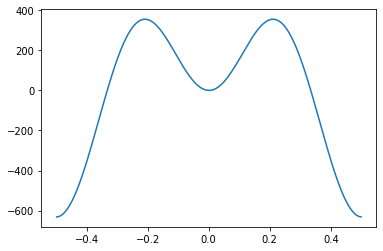

Derivative 3


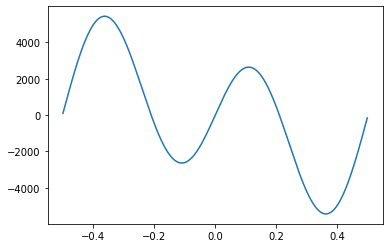

Derivative 4


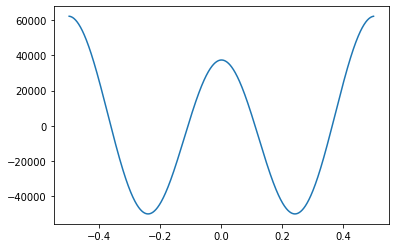

In [5]:
#% compute derivatives
k=1
dh=h3
dnu = nu
while k<=4:
    dh = np.diff(dh)/step
    dnu=dnu[1:]
    print(f'Derivative {k:1}')
    plt.plot(dnu,dh), plt.show()
    k=k+1


([<matplotlib.lines.Line2D at 0x128b16ba8>],
 Text(0.5, 1.0, 'Piecewise polynomial signal'))

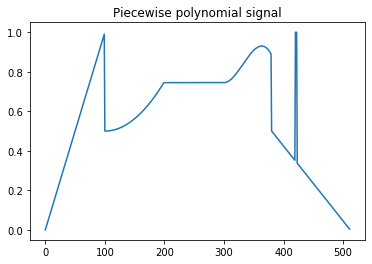

In [8]:
#%% Create a piecewise polynomial signal   
x=np.zeros(512)
N1 = 100
N2 = 200
N3 = 300
N4 = 380
N5 = 512

r1 = np.arange(0,N1)
r2 = np.arange(N1,N2)
r3 = np.arange(N2,N3)
r4 = np.arange(N3,N4)
r5 = np.arange(N4,N5)

x[r1] = r1/float(N1)
x[r2] =0.5+ ((r2-float(N1))/float(N2))**2
x[r3] = x[N2-1]
t4 = (r4-float(N3))/float(N4)
x[r4] = -80*t4**3 + 20*t4**2 + x[N2-1]
x[r5] = 0.5*(1-(r5-float(N4))/(float(N5-N4)))
x[420:423] =1
plt.plot(x), plt.title('Piecewise polynomial signal')


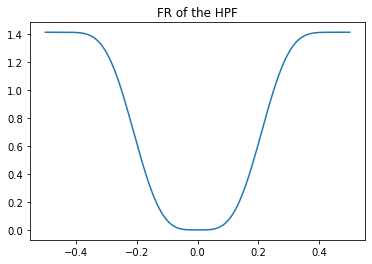

In [10]:
#%% Load the DWT filter 
w = pywt.Wavelet('db4')
Npoints = 2**13
step = 1.0/Npoints
HPF = np.fft.fft(w.dec_hi,Npoints)
HPF = np.fft.fftshift(HPF)
nu = np.arange(-0.5,0.5, step)
plt.title('FR of the HPF')
plt.plot(nu,abs(HPF))

Derivative 1


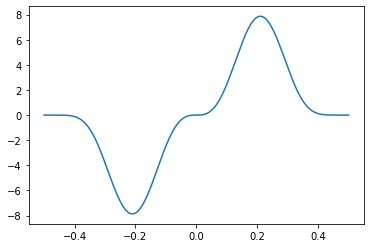

Derivative 2


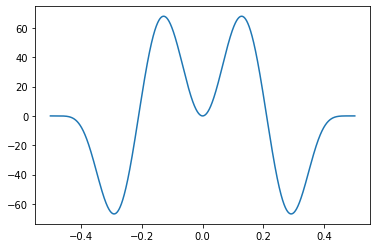

Derivative 3


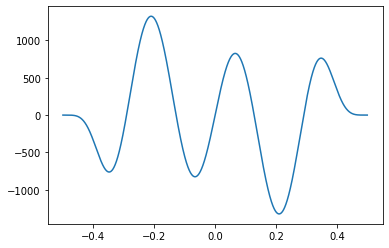

Derivative 4


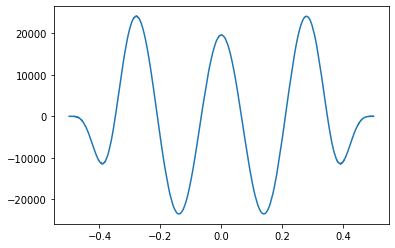

In [12]:
#% compute derivatives
k=1
dh=abs(HPF)
dnu = nu
while k<=4:
    dh = np.diff(dh)/step
    dnu=dnu[1:]
    print(f'Derivative {k:1}')
    plt.plot(dnu,dh), plt.show()
    k=k+1

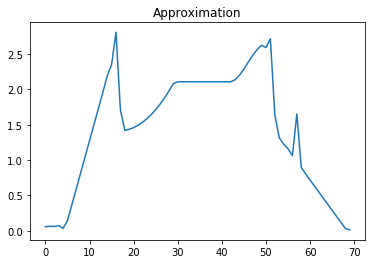

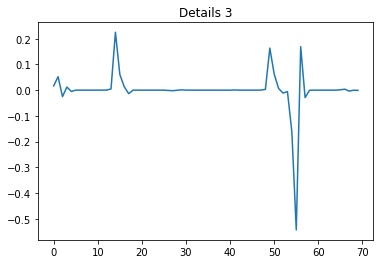

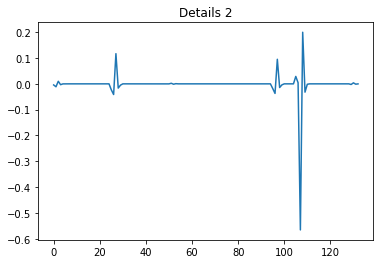

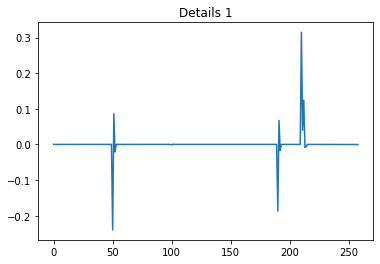

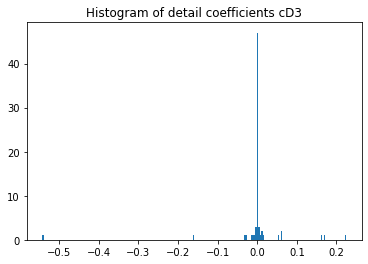

In [15]:
#%% Compute and show  the DWT
cA3, cD3, cD2, cD1 = pywt.wavedec(x, w, level=3)
plt.title('Approximation'), plt.plot(cA3), plt.show(),
plt.title('Details 3'), plt.plot(cD3), plt.show(),
plt.title('Details 2'), plt.plot(cD2), plt.show(),
plt.title('Details 1'), plt.plot(cD1), plt.show(),

plt.title('Histogram of detail coefficients cD3'), plt.hist(cD3,200)
plt.show()


### DWT of Gaussian noise

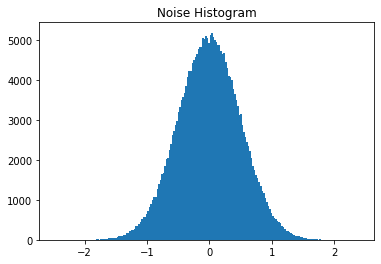

Sample STD  0.50


In [18]:
#%% Noise characteristics
largeN =  2**18
sigma = .5
noiseSamples = sigma * np.random.randn(largeN) # Generate largeN samples iid from N(sigma^2, 0 ) distribution
plt.hist(noiseSamples,200)
plt.title('Noise Histogram'), plt.show()
print(f'Sample STD {noiseSamples.std():5.2f}')


In [21]:
nLevel = 3
noiseWT = pywt.wavedec(noiseSamples, w, mode='per', level=nLevel)
noiseWTarray = np.zeros_like(noiseSamples)

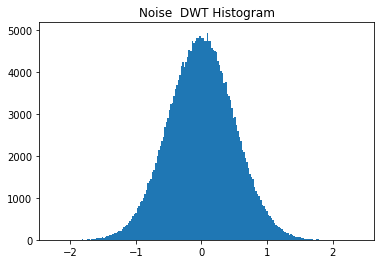

DWT coeff  STD  0.50


In [24]:
start=0
for idxLevel in range (nLevel+1):
    size =  len(noiseWT[idxLevel])
    noiseWTarray[start:start+size] = noiseWT[idxLevel]
    start = size+start
plt.hist(noiseWTarray,200)
plt.title('Noise  DWT Histogram'), plt.show()
print(f'DWT coeff  STD {noiseWTarray.std():5.2f}')

### 1-D signal denoising

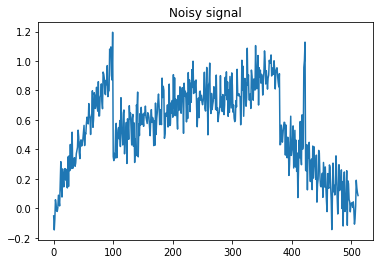

SNR: 15.56 dB


In [29]:
#%%  Add noise to the 1-D signal
sigma = .1
noise = sigma*np.random.randn(x.size)
y =  x + noise
plt.title('Noisy signal'), plt.plot(y), plt.show()
print(f"SNR: {wtt.sbSNR(x,y)[0]:5.2f} dB")

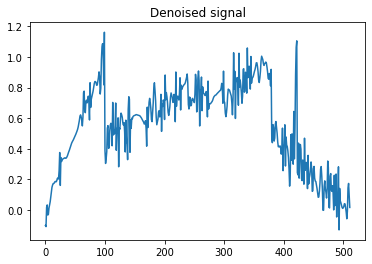

SNR: 17.73 dB


In [46]:
#%% Denoising with universal threshold 
nLevel = 3
thr  = sigma * np.sqrt(2 * np.log(4 * (1 - pow(2, -nLevel))))
coeffs = pywt.wavedec(y, w, mode='per', level=nLevel)
coeffsT = wtt.coeff1Dthresh(coeffs, thr)
xhat   = pywt.waverec(coeffsT, w, mode='per')
plt.title('Denoised signal'), plt.plot(xhat), plt.show()
print(f"SNR: {wtt.sbSNR(x,xhat)[0]:5.2f} dB")

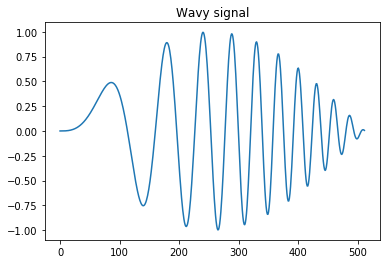

([<matplotlib.lines.Line2D at 0x12ace0be0>], Text(0.5, 1, 'Wavy signal'), None)

In [47]:
#% Wavy signal
N = 512.
r1 = np.arange(0,N)
omega = r1/N/50
x  = np.sin(np.pi*r1/N) * np.sin(2*np.pi*omega*r1)
plt.plot(r1,x), plt.title('Wavy signal'), plt.show()

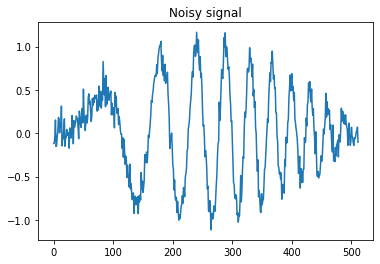

SNR: 14.02 dB


In [51]:
#  Add noise to the 1-D signal
sigma = 0.1
noise = sigma*np.random.randn(x.size)
y =  x + noise
plt.title('Noisy signal'), plt.plot(y), plt.show()
print(f"SNR: {wtt.sbSNR(x,y)[0]:5.2f} dB") 

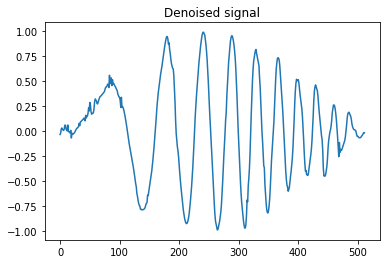

SNR Hard, univ: {????:5.2f} dB


In [52]:
#%% Universal threshold
nLevel = 4
thr  = sigma * np.sqrt(2 * np.log(4 * (1 - pow(2, -nLevel)))) # universal threshold (?)
coeffs = pywt.wavedec(y, w, mode='per', level=nLevel)
coeffsT = wtt.coeff1Dthresh(coeffs, thr, mode='soft')
xhat   = pywt.waverec(coeffsT, w, mode='per')
plt.title('Denoised signal'), plt.plot(xhat), plt.show()
print("SNR Hard, univ: {????:5.2f} dB")